In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import random
InteractiveShell.ast_node_interactivity = "all"
import os
from datetime import datetime
import matplotlib.pyplot as plt
#import plotly.express as px
import glob
from tqdm import tqdm

# Using plotly.express
import plotly.express as px

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

In [2]:
url = '../data/australia_prepared.csv'
aus_fires = pd.read_csv(url, parse_dates=['time'])
aus_fires.shape
aus_fires.head()

(1107520, 10)

,latitude,longitude,time,fire_count,confidence,frp,est_fire_area,est_brightness,loc_count,ranking
0,-12.5,141.9,2006-09-20,2,40,13.4,2.5,296.6,566,0.216150
1,-12.5,141.9,2006-08-18,3,70,35.3,2.3,306.8,566,0.335000
2,-12.5,141.9,2006-08-23,8,57,19.7,1.2,314.1,566,0.267074
3,-12.5,141.9,2006-08-24,2,74,22.4,1.7,311.7,566,0.336066
4,-12.5,141.9,2006-08-27,4,84,41.0,1.7,319.9,566,0.380469


In [3]:
aus_fires.sort_values(by=['loc_count'], ascending=False)

,latitude,longitude,time,fire_count,confidence,frp,est_fire_area,est_brightness,loc_count,ranking
0,-12.5,141.9,2006-09-20,2,40,13.4,2.5,296.6,566,0.216150
381,-12.5,141.9,2016-08-10,6,84,20.4,1.3,306.4,566,0.374003
375,-12.5,141.9,2012-08-09,2,43,10.1,1.0,312.8,566,0.196687
376,-12.5,141.9,2010-09-02,1,68,58.0,5.4,305.4,566,0.389851
377,-12.5,141.9,2010-09-06,1,98,27.1,1.8,305.6,566,0.432853
...,...,...,...,...,...,...,...,...,...,...
1104680,-19.8,138.2,2011-10-30,16,80,57.2,1.2,328.0,1,0.374300
1104681,-19.8,122.1,2012-11-08,26,94,299.6,1.2,356.4,1,0.461978
1104682,-21.3,115.7,2003-07-20,1,79,201.6,7.8,321.2,1,0.493140
1104683,-18.5,135.7,2004-12-06,1,77,34.9,4.8,303.1,1,0.411857


In [4]:
def filterLocation(aus_fires,latitude,longitude):
    filtered = aus_fires[(aus_fires.latitude == latitude)&(aus_fires.longitude == longitude)]
    return filtered

In [5]:
lat = -12.5
lng = 141.9
filtered = filterLocation(aus_fires,lat,lng)

In [6]:
filtered.head(25)

,latitude,longitude,time,fire_count,confidence,frp,est_fire_area,est_brightness,loc_count,ranking
0,-12.5,141.9,2006-09-20,2,40,13.4,2.5,296.6,566,0.216150
1,-12.5,141.9,2006-08-18,3,70,35.3,2.3,306.8,566,0.335000
2,-12.5,141.9,2006-08-23,8,57,19.7,1.2,314.1,566,0.267074
3,-12.5,141.9,2006-08-24,2,74,22.4,1.7,311.7,566,0.336066
4,-12.5,141.9,2006-08-27,4,84,41.0,1.7,319.9,566,0.380469
5,-12.5,141.9,2006-09-08,2,78,39.6,1.2,321.5,566,0.342761
6,-12.5,141.9,2006-09-18,3,75,18.9,2.1,299.9,566,0.349772
7,-12.5,141.9,2006-09-27,1,53,17.2,3.8,296.8,566,0.293879
8,-12.5,141.9,2006-09-28,2,68,10.0,1.7,299.1,566,0.311263
9,-12.5,141.9,2006-09-30,5,71,27.6,2.0,319.4,566,0.335452


In [28]:
# TIME SERIES

In [35]:
aus_fires_ts = TimeSeriesData(filtered)

In [36]:
print(type(aus_fires_ts.time))
print(type(aus_fires_ts.value.ranking))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [37]:
aus_fires_ts = TimeSeriesData(time=filtered.time, value=filtered.ranking)

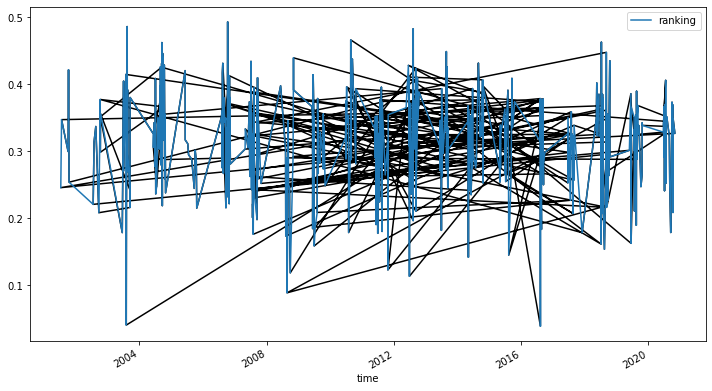

In [38]:
%matplotlib inline

# Must pass the name of the value columns to plot
aus_fires_ts.plot(cols=['ranking'])
plt.show()

In [12]:


fig = px.line(filtered, x='time', y="ranking",range_x=['2005-01-01', '2010-01-15'])
fig.show()